<a href="https://colab.research.google.com/github/adrianblazeusz/Machine-learning/blob/main/MY%20PROJECTS/Mental_health_text_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing Project

In this case, I will try to train a mod that will recognize whether the text is positive or negative.

## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

In [ ]:
all_data = pd.read_csv('/content/drive/MyDrive/Project/Physical health/mental_health.csv')

In [ ]:
all_data.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


As you can see the data set is evenly distributed 

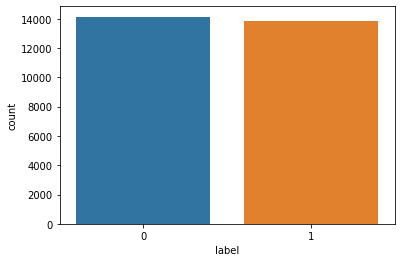

In [ ]:
sns.countplot(data=all_data, x="label")

Create two objects X and y. X will be the 'text' column of all_data and y will be the 'label' column of all_data. 

In [ ]:
X = all_data['text']
y = all_data['label']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

## Train Test Split
Let's split our data into training and testing data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


## Training a Model
Time to train a model!

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations¶
Time to see how our model did!

In [ ]:
predictions = nb.predict(X_test)

# Conclusion
As we can see model did preaty good job, especially in recognizing negative comments. The model may have porblemy with recognizing texts in which the author uses sarcasm. It may be helpful to train the model on a new dataset with a much larger number of sentences in which sarcasm is used 

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = predictions
cm = confusion_matrix(y_test, y_pred)
cm
def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['positive','negative'], index=['negative','positive'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title='Confusion Matrix-ACC= 85%', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.71      0.82      2802
           1       0.77      0.99      0.87      2794

    accuracy                           0.85      5596
   macro avg       0.88      0.85      0.84      5596
weighted avg       0.88      0.85      0.84      5596



## Now let's try another method
  Import TfidfVectorizer and Pipeline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

tfidf = TfidfVectorizer(max_features=25000)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (22381, 25000)
X_test shape: (5596, 25000)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.8750893495353824

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[2162,  640],
       [  59, 2735]])

In [ ]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['positive','negative'], index=['negative','positive'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title='Confusion Matrix-ACC= 88%', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['positive','negative']))

              precision    recall  f1-score   support

    positive       0.97      0.77      0.86      2802
    negative       0.81      0.98      0.89      2794

    accuracy                           0.88      5596
   macro avg       0.89      0.88      0.87      5596
weighted avg       0.89      0.88      0.87      5596



## Conclusion

As we can see, this method is better suited to a set of. The model may have porblemy with recognizing texts in which the author uses sarcasm.
